### data_analysis_presidency_similarity_and_clusters

* givn an author, find most similar presidents in terms of cosine similarity
* group presidents in clusters

In [35]:
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

#### load topic modelers and data from pickle files

In [19]:
presidents=['Donald J. Trump','Richard Nixon','John Adams','Lyndon B. Johnson','Dwight D. Eisenhower','Woodrow Wilson','Abraham Lincoln',
 'John F. Kennedy','George W. Bush','Grover Cleveland','William J. Clinton','Franklin D. Roosevelt','James Madison','Ulysses S. Grant','Barack Obama','William Howard Taft',
 'Andrew Jackson',
 'George Bush',
 'Ronald Reagan',
 'Harry S. Truman',
 'Gerald R. Ford','Herbert Hoover','George Washington','William Henry Harrison','Jimmy Carter','Warren G. Harding','Thomas Jefferson','Theodore Roosevelt']

In [81]:
filename = '/home/ubuntu/proj4/data/sample_30000_lsa_200_tfidf_data_5000.pkl'
with open(filename, 'rb') as fp:
    sample_lsa_tfidf, sample_lsa_tfidf_data = pickle.load(fp)



In [82]:
filename = '/home/ubuntu/proj4/data/sample_30000_lda_200_tfidf_data_5000.pkl'
with open(filename, 'rb') as fp:
    sample_lda_tfidf, sample_lda_tfidf_data = pickle.load(fp)

In [83]:
filename = '/home/ubuntu/proj4/data/sample_30000_nmf_200_tfidf_data_5000.pkl'
with open(filename, 'rb') as fp:
    sample_nmf_tfidf, sample_nmf_tfidf_data = pickle.load(fp)

In [12]:
filename = '/home/ubuntu/proj4/data/sample_30000_nmf_200_tfidf_sample_indices_.pkl'
with open(filename, 'rb') as fp:
    sample_docs_indices = pickle.load(fp)


In [13]:
filename='/home/ubuntu/proj4/data/sample_30000_nmf_200_tfidf_sample_authors_docs_.pkl'
with open(filename, 'rb') as fp:
    authors, docs = pickle.load(fp)


* __given author, calculate the percentage of all his documents on each of the 200 topics.__ 
* __form a vector consisting of these 200 percentages and use it to represent this author.__ 
* __this vector will be used to calculate cosine similarities and clusters.__
 

In [280]:
unique_authors = list(set(authors))

authors_indices={}
for author in unique_authors:
    authors_indices[author]=[index for index in range(len(authors)) if authors[index] == author]
    

In [286]:
authors_indices.keys()

dict_keys(['James K. Polk', 'Bobby Jindal', 'Tim Pawlenty', 'Bill Richardson', 'George Bush', 'Abraham Lincoln', 'Woodrow Wilson', 'Martin van Buren', 'Ted Cruz', 'Lyndon B. Johnson', 'James Monroe', 'John Quincy Adams', 'Minor/Third Party Platforms', 'John F. Kerry', 'Walter F. Mondale', 'Rudy Giuliani', 'John Tyler', 'Chester A. Arthur', 'Theodore Roosevelt', 'Calvin Coolidge', 'Mitt Romney', 'Barry Goldwater', 'Michelle Obama', 'Rutherford B. Hayes', 'John Kasich', 'Mike Pence', 'Franklin Pierce', 'Sarah Palin', 'Andrew Johnson', 'Dwight D. Eisenhower', 'Grover Cleveland', 'Richard B. Cheney', 'Robert Gibbs', 'Scott Walker', 'Fred Thompson', 'Jimmy Carter', 'Democratic Party Platforms', 'Sean Spicer', 'George W. Bush', 'Ben Carson', 'Rick Perry', 'Dana Perino', 'Michele Bachmann', 'Jay Carney', 'Ron Paul', 'Marco Rubio', 'Benjamin Harrison', 'Joseph Lieberman', 'Bernie Sanders', 'Rick Santorum', 'James A. Garfield', 'Tony Snow', 'Millard Fillmore', 'Lincoln Chafee', 'Richard Nixon',

In [292]:
'''
return a scaled vector representing given author in topic space
'''

def get_author_vec(topic_data, author):
    indices = authors_indices[author]
    author_vec=sum(topic_data[indices,:])/len(indices)
    return StandardScaler().fit_transform(author_vec.reshape(-1, 1))
    


In [291]:
presidents_indices={}
for i in range(len(presidents)):
    presidents_indices[presidents[i]]=[index for index in range(len(authors)) if authors[index] == presidents[i]]
    
    
    

In [91]:
'''
returns a list of scaled vectors each representing a president in given topic space
'''

def get_presidents_vecs(topic_data):
    presidents_vecs = []
    for i in range(len(presidents)):
        indices = presidents_indices[presidents[i]]
        presidents_vec=sum(topic_data[indices,:])/len(indices)
        presidents_vecs.append(presidents_vec)
    return StandardScaler().fit_transform(presidents_vecs)

In [92]:
lda_vecs=get_presidents_vecs(sample_lda_tfidf_data)

In [93]:
lsa_vecs=get_presidents_vecs(sample_lsa_tfidf_data)

In [94]:
nmf_vecs=get_presidents_vecs(sample_nmf_tfidf_data)

In [343]:
filename = '/home/ubuntu/proj4/data/lsa_vecs.pkl'
pickle.dump(lsa_vecs, open(filename, 'wb'))

In [344]:
filename = '/home/ubuntu/proj4/data/lda_vecs.pkl'
pickle.dump(lda_vecs, open(filename, 'wb'))

In [345]:
filename = '/home/ubuntu/proj4/data/nmf_vecs.pkl'
pickle.dump(nmf_vecs, open(filename, 'wb'))

In [97]:

lda_vecs[0]

array([-0.50782315, -0.08783354, -0.71168331, -0.50782315, -0.50782315,
       -0.50782315, -0.50782315, -0.58661407, -0.50782315, -0.50782315,
       -1.49310583, -0.50782315, -0.50782315, -0.50782315, -0.67952586,
       -0.50782315, -0.50782315, -0.50782315, -0.57267765, -0.50782315,
       -0.50782315, -0.48229041, -0.6215567 , -0.50782315, -0.50782315,
       -0.07015352, -0.50782315, -0.50782315,  0.00758821, -0.50782315,
       -0.50782315, -0.50782315,  0.48335112, -0.50782315, -0.50782315,
        1.18045231, -0.50782315, -0.50782315, -0.50782315, -0.50782315,
       -0.50782315, -0.50782315, -0.50782315,  3.26912974,  4.73452057,
       -0.50782315, -0.50782315, -0.50782315, -0.50782315, -0.50782315,
       -0.50782315, -0.50782315, -0.50782315,  2.41952596,  0.47400739,
       -0.50782315, -0.50782315, -0.50782315, -0.50782315, -0.50782315,
       -0.50782315, -0.50782315, -0.50782315,  0.89147007, -0.50782315,
       -0.50782315, -0.50782315, -0.50782315, -0.50782315, -0.50

#### visulization of vectors representing  presidents in tSNE space

In [584]:
from sklearn.manifold import TSNE
#tried perplexity of 5, 10, 20, 30, 40, then 6,7,8,9.  5-9 have best defined clusters
lda_embedded = TSNE(n_components=2, perplexity=15, verbose=2,n_iter=1600).fit_transform(lda_vecs)

[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 11.169649
[t-SNE] Computed conditional probabilities in 0.001s
[t-SNE] Iteration 50: error = 45.8223724, gradient norm = 0.5022720 (50 iterations in 0.018s)
[t-SNE] Iteration 100: error = 48.0109253, gradient norm = 0.3837562 (50 iterations in 0.018s)
[t-SNE] Iteration 150: error = 52.8132935, gradient norm = 0.5036412 (50 iterations in 0.017s)
[t-SNE] Iteration 200: error = 49.6217117, gradient norm = 0.5123022 (50 iterations in 0.017s)
[t-SNE] Iteration 250: error = 49.9808578, gradient norm = 0.4944986 (50 iterations in 0.017s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.980858
[t-SNE] Iteration 300: error = 0.8887477, gradient norm = 0.0011109 (50 iterations in 0.017s)
[t-SNE] Iteration 350: error = 0.6763365, gradient norm = 0.0012742 (50 

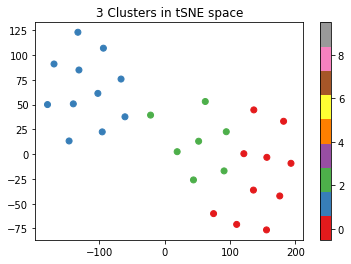

In [585]:
colors = labels
plt.scatter(lda_embedded[:, 0], lda_embedded[:, 1], c=colors, cmap=plt.cm.Set1);
plt.clim(-0.5, 9.5)
plt.colorbar()
plt.title('3 Clusters in tSNE space')




####  get presidents most similar to given author in terms of cosine similarity

In [340]:
from sklearn.neighbors import NearestNeighbors

president_topic_vecs = lsa_vecs

'''
returns a list of presidents most similar to given author
'''

def get_similar_presidents(author, num_similar_presidents):

    nn = NearestNeighbors(n_neighbors=num_similar_presidents+1, metric='cosine', algorithm='brute')
    vecs = president_topic_vecs
    author_vec = get_author_vec(sample_lsa_tfidf_data,author)
    
    nn.fit(vecs)
    
    results = nn.kneighbors(np.array(author_vec).reshape(1, -1))
    
    #print(results)
    
    similar_presidents_indices= results[1][0]
    return [presidents[i] for i in similar_presidents_indices if presidents[i]!=author][:num_similar_presidents]


get_similar_presidents('George W. Bush',3)

(array([[0.63652841, 0.8609783 , 0.86777729, 0.87209599]]), array([[ 8, 14, 17, 10]]))


['Barack Obama', 'George Bush', 'William J. Clinton']

In [349]:
# pickle nessary data for flask app
filename = '/home/ubuntu/proj4/data/flask_data.pkl'
pickle.dump((authors_indices,lsa_vecs,sample_lsa_tfidf_data,presidents), open(filename, 'wb'))

#### use PCA to reduce dimentions before doing clusting

In [ ]:
def get_pca(X, explained_percentage):
    pca = PCA(n_components=explained_percentage)
    pca.fit(X)
    X_pca = pca.transform(X)
    return StandardScaler().fit_transform(X_pca)
    

In [307]:
lda_85=get_pca(lda_vecs, 0.85)
lda_85.shape

(28, 1)

In [209]:
X_pca = lda_85

#### clustering

In [210]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



# lsa results
SSEs = []
Sil_coefs = []
for k in range(2,25):

    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_pca)
    labels = km.labels_
    Sil_coefs.append(silhouette_score(X_pca, labels))
    SSEs.append(km.inertia_)

    print('k = ',k, "silhouette_score = ", silhouette_score(X_pca,labels))

k =  2 silhouette_score =  0.7576805458302965
k =  3 silhouette_score =  0.6642023245460207
k =  4 silhouette_score =  0.6328048411978652
k =  5 silhouette_score =  0.6304464286496338
k =  6 silhouette_score =  0.6028814292288714
k =  7 silhouette_score =  0.6034888626926157
k =  8 silhouette_score =  0.620267518504569
k =  9 silhouette_score =  0.635445571461046
k =  10 silhouette_score =  0.6173089885180222
k =  11 silhouette_score =  0.5696590395001583
k =  12 silhouette_score =  0.5358179351866817
k =  13 silhouette_score =  0.5060507370551939
k =  14 silhouette_score =  0.46856728340237075
k =  15 silhouette_score =  0.46816178477265996
k =  16 silhouette_score =  0.46408611174740166
k =  17 silhouette_score =  0.44130034958034875
k =  18 silhouette_score =  0.3859896542214395
k =  19 silhouette_score =  0.39939411090634225
k =  20 silhouette_score =  0.35604874726640073
k =  21 silhouette_score =  0.3360028362542281
k =  22 silhouette_score =  0.2972202989834224
k =  23 silhouett

In [211]:
num_clusters = 3

km = KMeans(n_clusters=num_clusters, random_state=1)
km.fit(X_pca)
labels = km.labels_

km.

clusters = {}

for i in range(num_clusters):
    clusters[i]=[]
for i in range(len(labels)):
    clusters[labels[i]].append(presidents[i])
for i in range(num_clusters):
    print('cluster ',i,': size = ',len(clusters[i]))
    for president in clusters[i]:
        print(president)
    print('\n')

cluster  0 : size =  10
Richard Nixon
Lyndon B. Johnson
Dwight D. Eisenhower
Woodrow Wilson
John F. Kennedy
George W. Bush
William J. Clinton
Barack Obama
Gerald R. Ford
Warren G. Harding


cluster  1 : size =  11
John Adams
Abraham Lincoln
Grover Cleveland
James Madison
Ulysses S. Grant
William Howard Taft
Andrew Jackson
Herbert Hoover
George Washington
Thomas Jefferson
Theodore Roosevelt


cluster  2 : size =  7
Donald J. Trump
Franklin D. Roosevelt
George Bush
Ronald Reagan
Harry S. Truman
William Henry Harrison
Jimmy Carter




([<matplotlib.axis.YTick at 0x7f83441b75f8>,
 <a list of 3 Text yticklabel objects>)

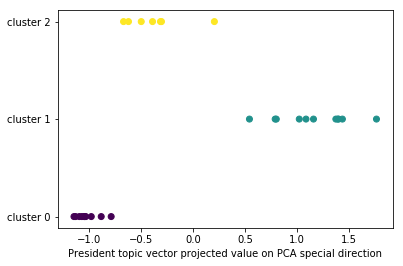

In [473]:
from matplotlib import cm
plt.scatter(X_pca,labels, c=labels)
plt.ylabel('')
plt.xlabel('President topic vector projected value on PCA special direction')
plt.yticks([0,1,2], ['cluster 0','cluster 1','cluster 2'], rotation='horizontal')
